# Desafío Integrador: Análsis Exploratorio de Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

In [2]:
df = pd.read_csv('../TP_Integrador/df_final.csv')

C:\Users\cmora\AppData\Local\Temp\ipykernel_41752\2300795430.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../TP_Integrador/df_final.csv')


In [28]:
df.head(4)

,crash_date,borough,zip code,latitude,longitude,location,collision_id,injured,deaths_number,vehicle,main_contributing_factor,road_type,crash_time,time_of_day,weekday,season,deaths
0,2021-12-14,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",4486519,0,0,Passenger vehicle,Passing Too Closely,Avenue,14:58:00,Day,Tuesday,Winter,0
1,2021-12-14,QUEENS,11413.0,40.675884,-73.755770,"(40.675884, -73.75577)",4487127,0,0,Passenger vehicle,Turning Improperly,Boulevard,16:50:00,Day,Tuesday,Winter,0
2,2021-12-14,QUEENS,11434.0,40.666840,-73.789410,"(40.66684, -73.78941)",4486635,4,0,Passenger vehicle,Other,Avenue,23:10:00,Night,Tuesday,Winter,0
3,2021-12-14,BROOKLYN,11211.0,40.710957,-73.951126,"(40.710957, -73.951126)",4486556,2,0,Bus,Passing or Lane Usage Improper,Street,17:15:00,Day,Tuesday,Winter,0


In [27]:
df['road_type'] = df['road_type'].str.title()
df['time_of_day'] = df['time_of_day'].str.title()

In [4]:
df.shape

(438928, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438928 entries, 0 to 438927
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   crash_date                438928 non-null  object 
 1   borough                   438928 non-null  object 
 2   zip code                  438928 non-null  object 
 3   latitude                  438928 non-null  float64
 4   longitude                 438928 non-null  float64
 5   location                  438928 non-null  object 
 6   collision_id              438928 non-null  int64  
 7   injured                   438928 non-null  int64  
 8   deaths_number             438928 non-null  int64  
 9   vehicle                   438928 non-null  object 
 10  main_contributing_factor  438928 non-null  object 
 11  road_type                 438928 non-null  object 
 12  crash_time                438928 non-null  object 
 13  time_of_day               438928 non-null  o

In [6]:
df.deaths.value_counts(normalize=True)  # Variable target 'deaths' muy desbalanceada

deaths
0    0.998556
1    0.001444
Name: proportion, dtype: float64

## Número de heridos

In [7]:
df.injured.describe()

count    438928.000000
mean          0.690152
std           1.456834
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          54.000000
Name: injured, dtype: float64

In [35]:
df.injured.value_counts()

injured
0     326548
2      85930
4      16526
6       5316
8       1947
1       1283
10       753
12       297
14       138
16        64
3         35
20        25
18        23
22         8
5          5
28         4
30         4
24         4
36         3
32         3
9          2
34         2
26         2
44         2
40         1
38         1
54         1
48         1
Name: count, dtype: int64

In [3]:
sns.set_style('ticks')
sns.set_context("poster", font_scale=.65)

In [4]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

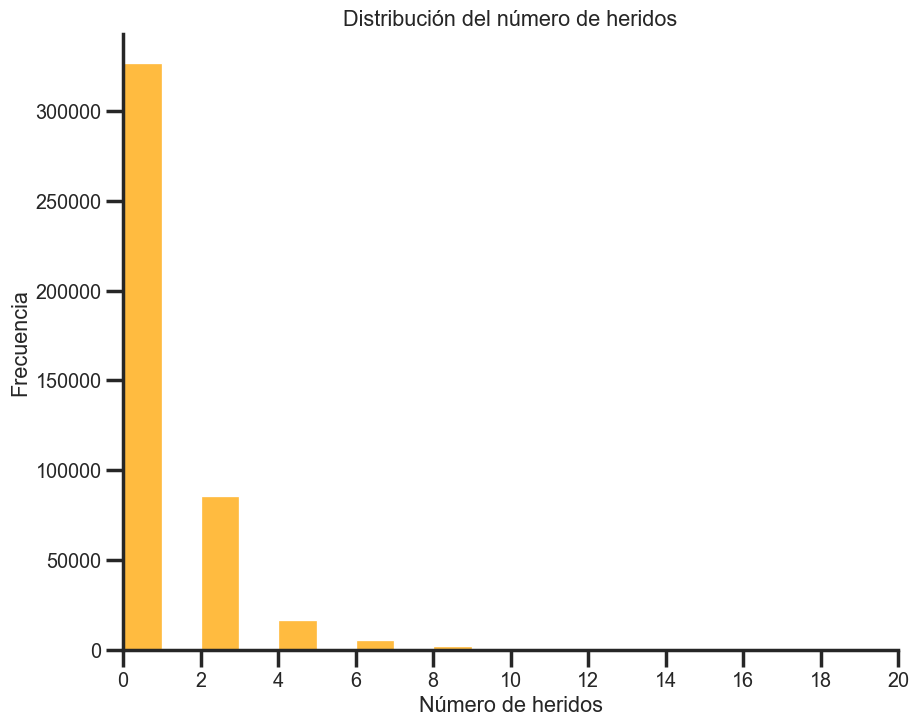

In [16]:
plt.figure(figsize=(10, 8))
g = sns.histplot(df['injured'], color = "orange", binwidth=1)
g.set_title("Distribución del número de heridos")
g.set_xlabel("Número de heridos")
g.set_ylabel("Frecuencia")
g.set_xlim(0, 20)
g.set_xticks(list(range(0, 21, 2)))
sns.despine()


## Número de fallecidos

In [12]:
df.deaths_number.describe()

count    438928.000000
mean          0.002987
std           0.081467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: deaths_number, dtype: float64

In [33]:
df.deaths_number.value_counts(normalize=True)

deaths_number
0     0.998556
2     0.001383
4     0.000030
1     0.000021
6     0.000007
8     0.000002
10    0.000002
Name: proportion, dtype: float64

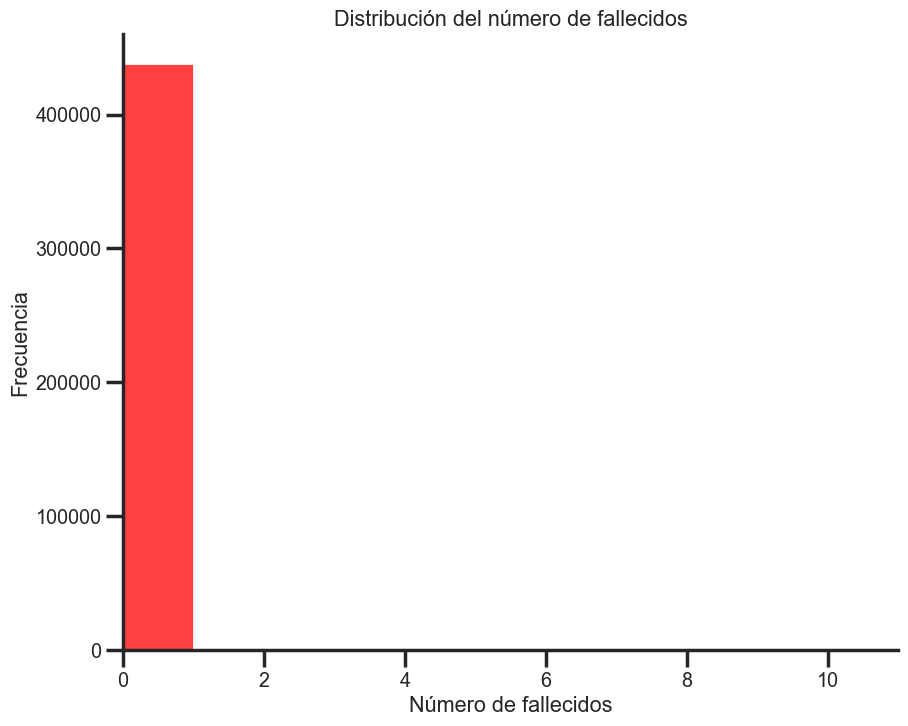

In [6]:
plt.figure(figsize=(10, 8))
g = sns.histplot(df['deaths_number'], color = "red", binwidth=1)
g.set_title("Distribución del número de fallecidos")
g.set_xlabel("Número de fallecidos")
g.set_ylabel("Frecuencia")
g.set_xlim(0, 11)
g.set_xticks(list(range(0, 11, 2)))
sns.despine()

## Tipos de vehículo

In [15]:
print(df.crash_date.max())
print(df.crash_date.min())

2023-03-26
2012-07-01


In [16]:
df.vehicle.value_counts()

vehicle
SUV                         177545
Passenger vehicle           159786
Taxi                         32336
Truck                        24337
Van                          12439
Bus                          11798
Large commercial vehicle      7636
Other                         6624
Bike                          4543
Motorcycle                    1884
Name: count, dtype: int64

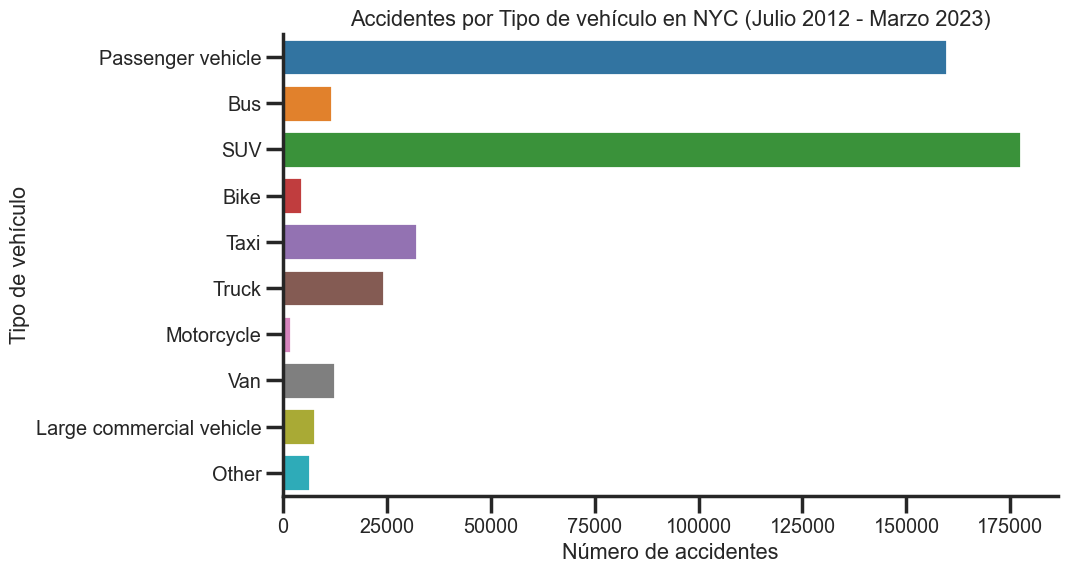

In [7]:
plt.figure(figsize=(10, 6))
g = sns.countplot(y=df.vehicle, orient='h')
plt.xlabel('Número de accidentes')
plt.ylabel('Tipo de vehículo')
plt.title(f'Accidentes por Tipo de vehículo en NYC (Julio 2012 - Marzo 2023)')
sns.despine()

In [18]:
df.groupby('vehicle').deaths_number.sum().sort_values(ascending=False)

vehicle
SUV                         510
Passenger vehicle           346
Motorcycle                  102
Truck                        89
Bus                          80
Large commercial vehicle     53
Taxi                         40
Van                          33
Bike                         30
Other                        28
Name: deaths_number, dtype: int64

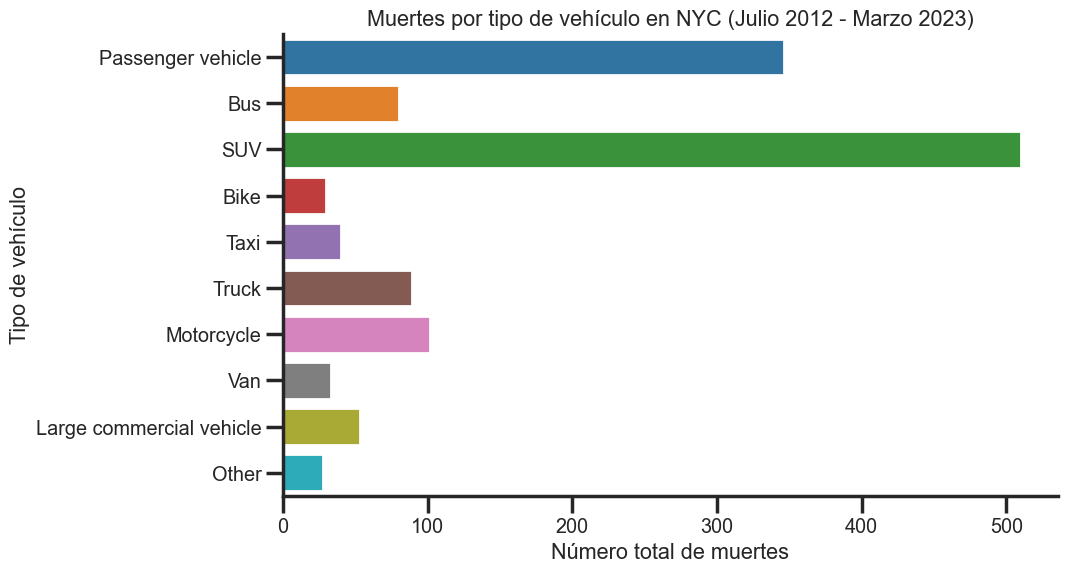

In [8]:
plt.figure(figsize=(10, 6))
v = sns.barplot(data=df, x='deaths_number', y="vehicle", estimator=sum, ci=None, orient='h')
plt.xlabel('Número total de muertes')
plt.ylabel('Tipo de vehículo')
plt.title('Muertes por tipo de vehículo en NYC (Julio 2012 - Marzo 2023)')
sns.despine()

In [20]:
df.groupby('vehicle').deaths_number.mean().sort_values(ascending=False)

vehicle
Motorcycle                  0.054140
Large commercial vehicle    0.006941
Bus                         0.006781
Bike                        0.006604
Other                       0.004227
Truck                       0.003657
SUV                         0.002873
Van                         0.002653
Passenger vehicle           0.002165
Taxi                        0.001237
Name: deaths_number, dtype: float64

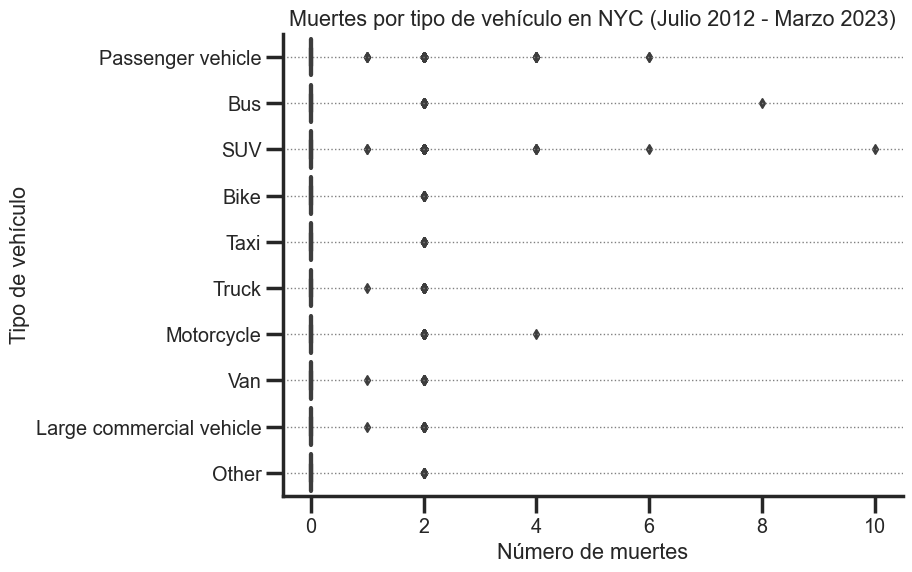

In [9]:
plt.figure(figsize=(8, 6))
v = sns.boxplot(data=df, x='deaths_number', y="vehicle", orient='h')
plt.xlabel('Número de muertes')
plt.ylabel('Tipo de vehículo')
plt.title('Muertes por tipo de vehículo en NYC (Julio 2012 - Marzo 2023)')

y_values = list(range(len(df.vehicle.unique())))
for y in y_values:
    plt.axhline(y=y, color='gray', linestyle='dotted', linewidth=1)
sns.despine()

## Main contributing factor

In [22]:
df.main_contributing_factor.value_counts()

main_contributing_factor
Driver Inattention/Distraction    141383
Other                              64613
Failure to Yield Right-of-Way      50184
Following Too Closely              32161
Backing Unsafely                   21300
Passing or Lane Usage Improper     18992
Turning Improperly                 17328
Traffic Control Disregarded        17278
Passing Too Closely                16266
Fatigued/Drowsy                    11842
Unsafe Lane Changing               11265
Driver Inexperience                 9586
Unsafe Speed                        8215
Lost Consciousness                  6555
Alcohol Involvement                 6467
Pavement Slippery                   5493
Name: count, dtype: int64

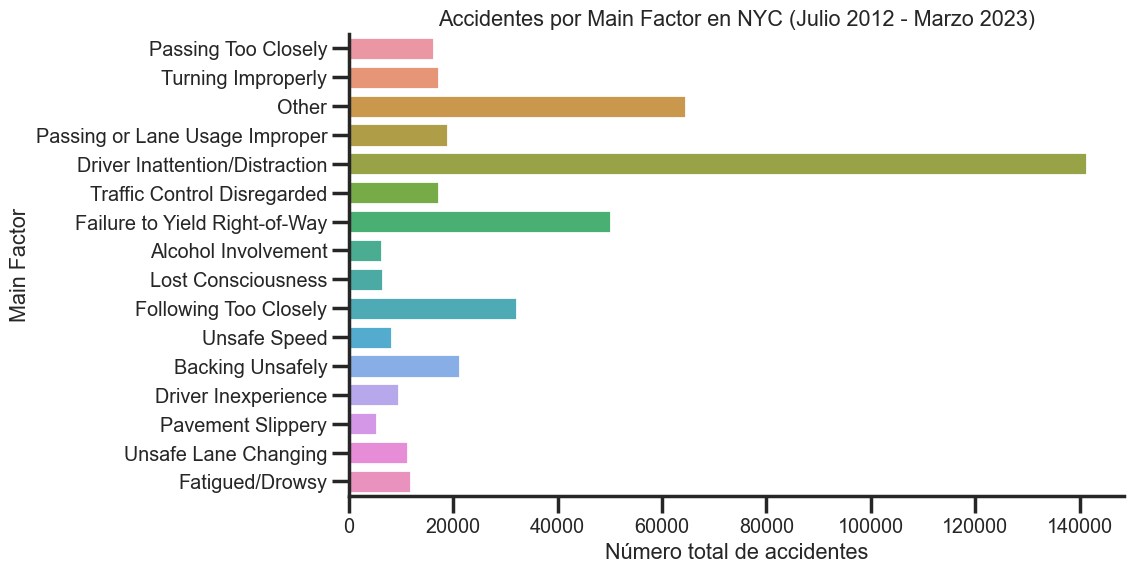

In [17]:
plt.figure(figsize=(10, 6))
g = sns.countplot(y=df.main_contributing_factor, orient='h')
plt.xlabel('Número total de accidentes')
plt.ylabel('Main Factor')
plt.title(f'Accidentes por Main Factor en NYC (Julio 2012 - Marzo 2023)')
sns.despine()

In [24]:
df.groupby('main_contributing_factor').deaths_number.sum().sort_values(ascending=False)

main_contributing_factor
Failure to Yield Right-of-Way     299
Driver Inattention/Distraction    243
Other                             219
Unsafe Speed                      204
Traffic Control Disregarded       183
Backing Unsafely                   40
Alcohol Involvement                36
Driver Inexperience                35
Passing or Lane Usage Improper     20
Lost Consciousness                 14
Following Too Closely              12
Turning Improperly                  4
Unsafe Lane Changing                2
Fatigued/Drowsy                     0
Passing Too Closely                 0
Pavement Slippery                   0
Name: deaths_number, dtype: int64

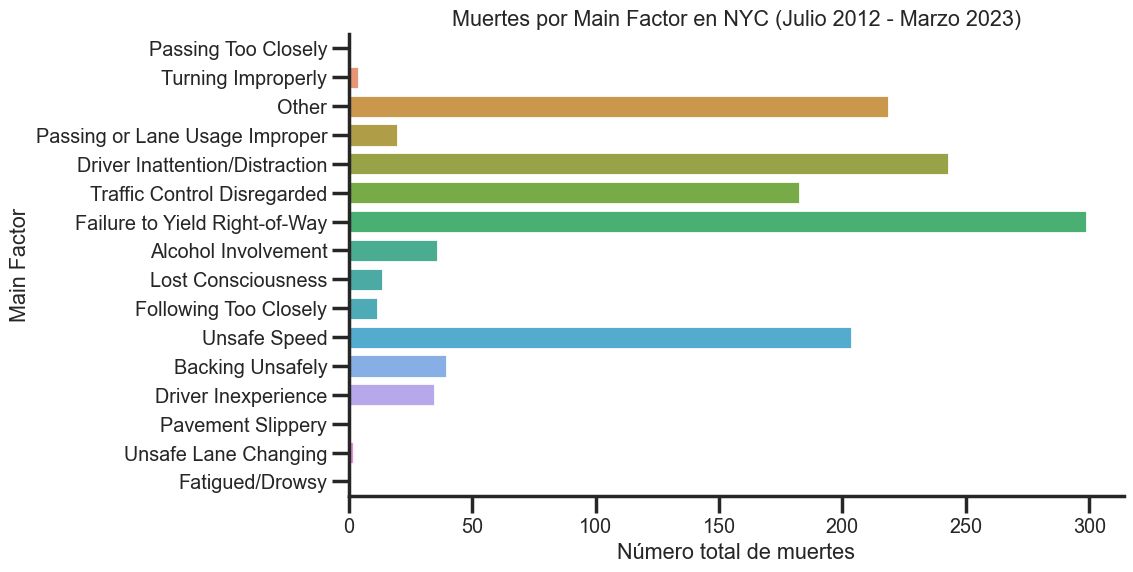

In [11]:
plt.figure(figsize=(10, 6))
v = sns.barplot(data=df, x="deaths_number", y='main_contributing_factor', estimator=sum, orient='h', ci=None)
plt.xlabel('Número total de muertes')
plt.ylabel('Main Factor')
plt.title('Muertes por Main Factor en NYC (Julio 2012 - Marzo 2023)')
sns.despine()

In [26]:
df.groupby('main_contributing_factor').deaths_number.mean().sort_values(ascending=False)

main_contributing_factor
Unsafe Speed                      0.024833
Traffic Control Disregarded       0.010592
Failure to Yield Right-of-Way     0.005958
Alcohol Involvement               0.005567
Driver Inexperience               0.003651
Other                             0.003389
Lost Consciousness                0.002136
Backing Unsafely                  0.001878
Driver Inattention/Distraction    0.001719
Passing or Lane Usage Improper    0.001053
Following Too Closely             0.000373
Turning Improperly                0.000231
Unsafe Lane Changing              0.000178
Fatigued/Drowsy                   0.000000
Passing Too Closely               0.000000
Pavement Slippery                 0.000000
Name: deaths_number, dtype: float64

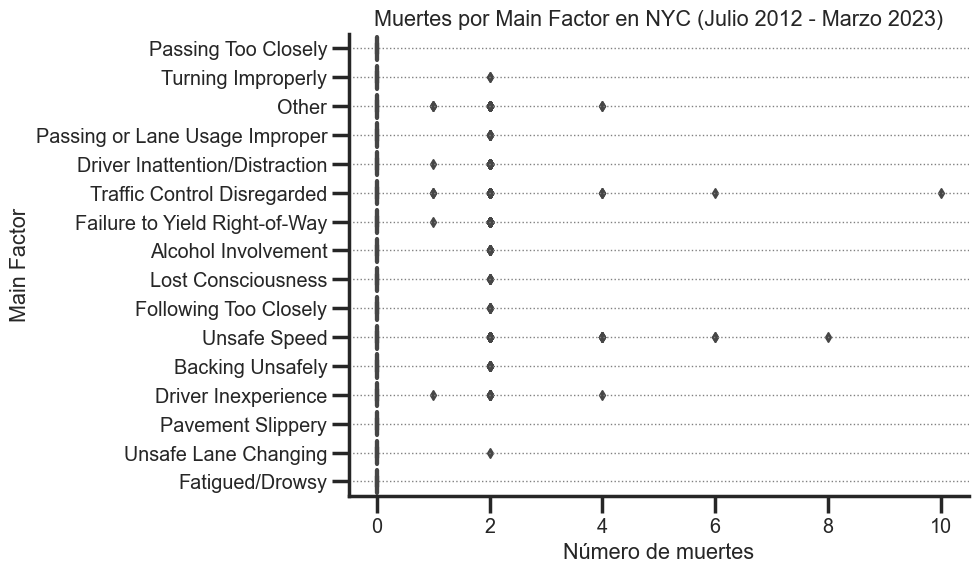

In [83]:
plt.figure(figsize=(8, 6))
v = sns.boxplot(data=df, x="deaths_number", y='main_contributing_factor', orient='h')
plt.xlabel('Número de muertes')
plt.ylabel('Main Factor')
plt.title('Muertes por Main Factor en NYC (Julio 2012 - Marzo 2023)')

y_values = list(range(len(df.main_contributing_factor.unique())))
for y in y_values:
    plt.axhline(y=y, color='gray', linestyle='dotted', linewidth=1)
sns.despine()

## Tipo de vía

In [32]:
df.road_type.value_counts()

road_type
Avenue       193410
Street       170722
Boulevard     35770
Road          25784
Way           13242
Name: count, dtype: int64

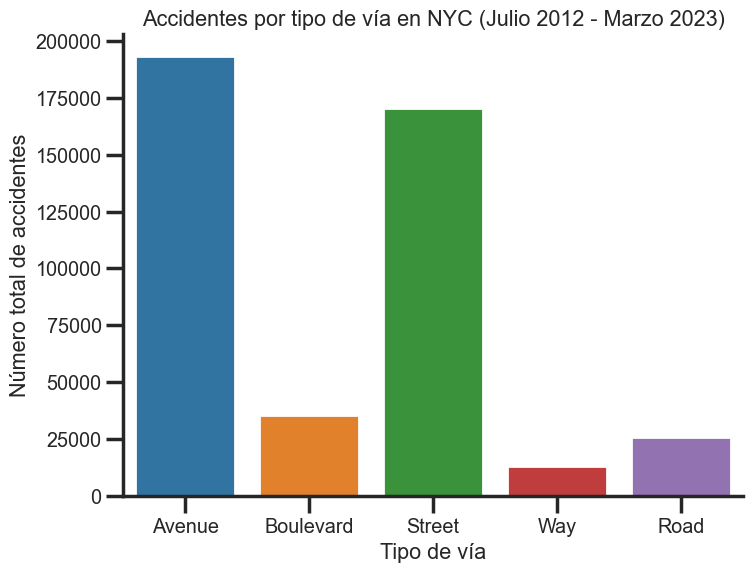

In [31]:
plt.figure(figsize=(8, 6))
g = sns.countplot(x=df.road_type)
plt.xlabel('Tipo de vía')
plt.ylabel('Número total de accidentes')
plt.title(f'Accidentes por tipo de vía en NYC (Julio 2012 - Marzo 2023)')
sns.despine()

In [30]:
df.groupby('road_type').deaths_number.sum().sort_values(ascending=False)

road_type
avenue       671
street       368
boulevard    134
road          80
way           58
Name: deaths_number, dtype: int64

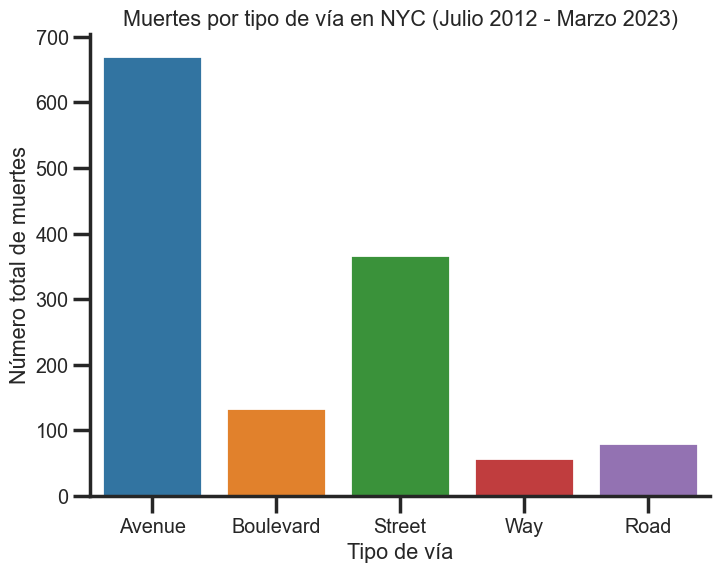

In [30]:
plt.figure(figsize=(8, 6))
v = sns.barplot(data=df, x='road_type', y="deaths_number", estimator=sum, ci=None)
plt.xlabel('Tipo de vía')
plt.ylabel('Número total de muertes')
plt.title('Muertes por tipo de vía en NYC (Julio 2012 - Marzo 2023)')
sns.despine()

In [32]:
df.groupby('road_type').deaths_number.mean().sort_values(ascending=False)

road_type
way          0.004380
boulevard    0.003746
avenue       0.003469
road         0.003103
street       0.002156
Name: deaths_number, dtype: float64

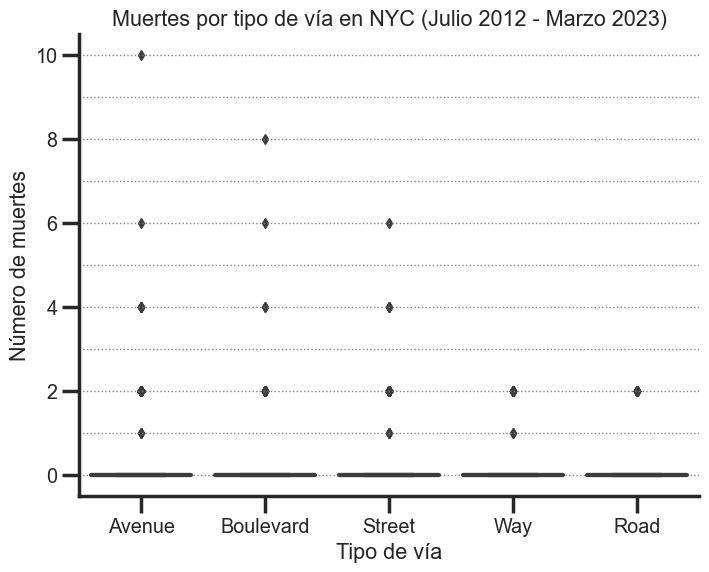

In [29]:
plt.figure(figsize=(8, 6))
v = sns.boxplot(data=df, x='road_type', y="deaths_number")
plt.xlabel('Tipo de vía')
plt.ylabel('Número de muertes')
plt.title('Muertes por tipo de vía en NYC (Julio 2012 - Marzo 2023)')

y_values = list(range(0, 11))
for y in y_values:
    plt.axhline(y=y, color='gray', linestyle='dotted', linewidth=1)
sns.despine()